# Sección Redes Recurrente LSTM

# Sección Prediccion de Covid en Santa Cruz Bolivia

In [130]:
# importmamos las librerias necesarias
import torch
import torch.nn as nn
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [135]:
# Leemos los datos desde Drive
flight_data = pd.read_csv('/content/drive/MyDrive/SIS 421/Segunda Instancia/CovidSantaCruz.csv', index_col=0, delimiter=";")
flight_data.head()


,region,cases,recovered,deceased,population,active,active_per_10k,deceased_per_million,suceptible,removed
date,,,,,,,,,,
21/03/2020,Santa Cruz,9,0,0,3370059,9,0.026705763905023622,0.0,3370050,0
22/03/2020,Santa Cruz,15,0,0,3370059,15,0.044509606508372705,0.0,3370044,0
23/03/2020,Santa Cruz,16,0,0,3370059,16,0.04747691360893088,0.0,3370043,0
24/03/2020,Santa Cruz,18,0,0,3370059,18,0.053411527810047245,0.0,3370041,0
25/03/2020,Santa Cruz,24,0,0,3370059,24,0.07121537041339632,0.0,3370035,0


In [136]:
# Dimensiones del dataset
flight_data.shape


(122, 10)

In [137]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 15*2
fig_size[1] = 5*2
plt.rcParams["figure.figsize"] = fig_size


In [141]:
limite = len(flight_data['cases'])
xx = np.arange(0, limite, 1)
# print(xx)

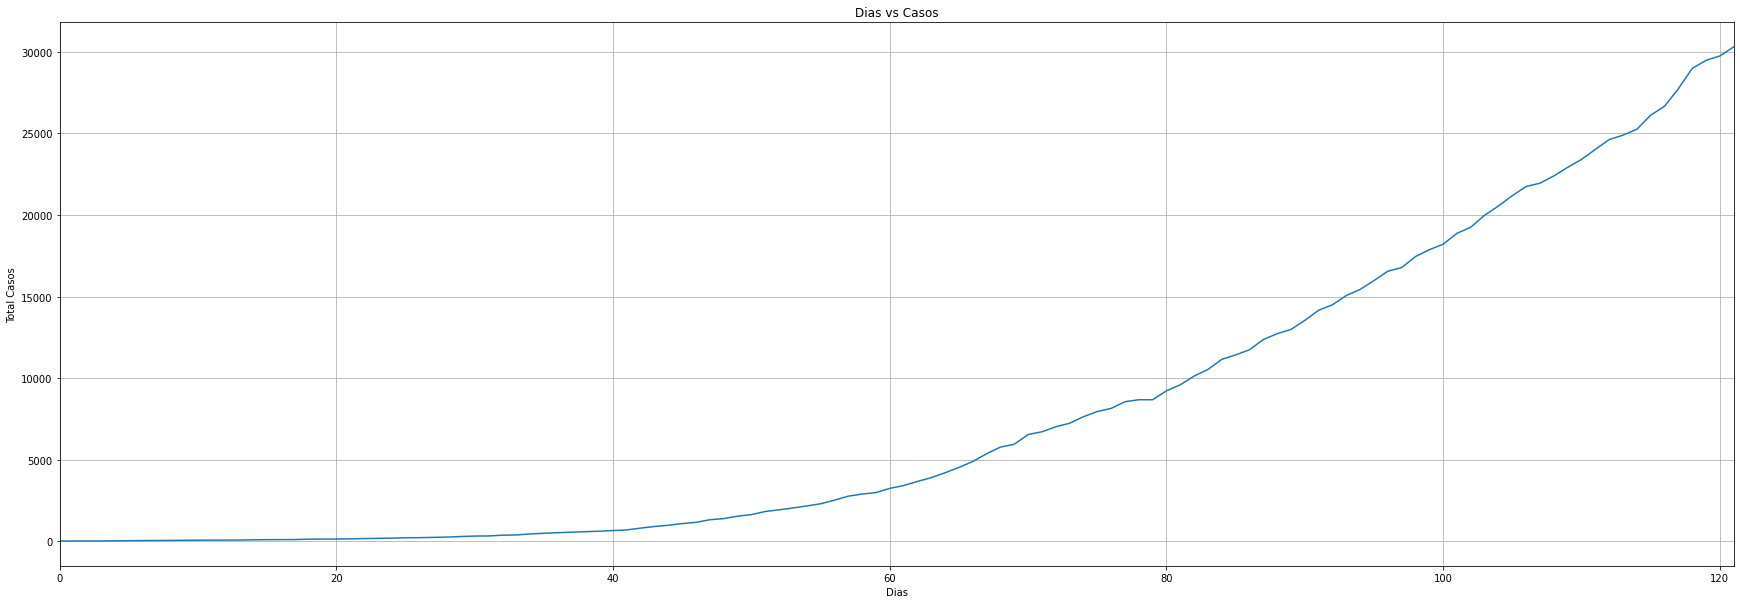

In [143]:
plt.title('Dias vs Casos')
plt.ylabel('Total Casos')
plt.xlabel('Dias')
plt.grid(True)
plt.autoscale(axis='x',tight=True)
plt.plot(xx,flight_data['cases'])


In [74]:
flight_data.columns


Index(['region', 'cases', 'recovered', 'deceased', 'population', 'active',
       'active_per_10k', 'deceased_per_million', 'suceptible', 'removed'],
      dtype='object')

In [146]:
# Convertimos a float los datos
all_data = flight_data['cases'].values.astype(float)


In [145]:
print(all_data)


[9.0000e+00 1.5000e+01 1.6000e+01 1.8000e+01 2.4000e+01 3.4000e+01
 4.2000e+01 4.4000e+01 5.2000e+01 5.9000e+01 6.4000e+01 6.8000e+01
 7.0000e+01 7.4000e+01 8.8000e+01 9.7000e+01 1.0000e+02 1.0300e+02
 1.2700e+02 1.3000e+02 1.3400e+02 1.4700e+02 1.6300e+02 1.7700e+02
 1.9000e+02 2.1500e+02 2.1800e+02 2.3700e+02 2.5500e+02 2.9000e+02
 3.1700e+02 3.2400e+02 3.7100e+02 3.8500e+02 4.4600e+02 4.8900e+02
 5.2500e+02 5.5300e+02 5.8700e+02 6.1500e+02 6.5600e+02 6.9300e+02
 8.0600e+02 9.0400e+02 9.7900e+02 1.0830e+03 1.1600e+03 1.3180e+03
 1.3870e+03 1.5370e+03 1.6330e+03 1.8230e+03 1.9250e+03 2.0410e+03
 2.1630e+03 2.2970e+03 2.5180e+03 2.7630e+03 2.8940e+03 2.9820e+03
 3.2410e+03 3.4140e+03 3.6650e+03 3.9000e+03 4.1990e+03 4.5270e+03
 4.8880e+03 5.3660e+03 5.7740e+03 5.9460e+03 6.5420e+03 6.7110e+03
 7.0180e+03 7.2350e+03 7.6370e+03 7.9520e+03 8.1440e+03 8.5560e+03
 8.6760e+03 8.6760e+03 9.2240e+03 9.5940e+03 1.0127e+04 1.0536e+04
 1.1154e+04 1.1424e+04 1.1741e+04 1.2366e+04 1.2725e+04 1.2988

In [147]:
test_data_size = 14 # Datos para la evaluacion

train_data = all_data[:-test_data_size]
test_data = all_data[-test_data_size:]


In [148]:
print(len(train_data))
print(len(test_data))


108
14


In [150]:
# Normalizamos los datos entre 1 y -1
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(-1, 1))
train_data_normalized = scaler.fit_transform(train_data .reshape(-1, 1))


In [152]:
# Mostramos datos normalizados
print(train_data_normalized[:5])
print(train_data_normalized[-5:])


[[-1.        ]
 [-0.99945315]
 [-0.99936201]
 [-0.99917973]
 [-0.99863288]]
[[0.82118119]
 [0.87285818]
 [0.93045935]
 [0.98168064]
 [1.        ]]


In [153]:
# Convertir a tensores de Pytorch
train_data_normalized = torch.FloatTensor(train_data_normalized).view(-1)
train_data_normalized


tensor([-1.0000, -0.9995, -0.9994, -0.9992, -0.9986, -0.9977, -0.9970, -0.9968,
        -0.9961, -0.9954, -0.9950, -0.9946, -0.9944, -0.9941, -0.9928, -0.9920,
        -0.9917, -0.9914, -0.9892, -0.9890, -0.9886, -0.9874, -0.9860, -0.9847,
        -0.9835, -0.9812, -0.9810, -0.9792, -0.9776, -0.9744, -0.9719, -0.9713,
        -0.9670, -0.9657, -0.9602, -0.9563, -0.9530, -0.9504, -0.9473, -0.9448,
        -0.9410, -0.9377, -0.9274, -0.9184, -0.9116, -0.9021, -0.8951, -0.8807,
        -0.8744, -0.8607, -0.8520, -0.8347, -0.8254, -0.8148, -0.8037, -0.7915,
        -0.7713, -0.7490, -0.7371, -0.7290, -0.7054, -0.6897, -0.6668, -0.6454,
        -0.6181, -0.5882, -0.5553, -0.5118, -0.4746, -0.4589, -0.4046, -0.3892,
        -0.3612, -0.3414, -0.3048, -0.2761, -0.2586, -0.2210, -0.2101, -0.2101,
        -0.1601, -0.1264, -0.0778, -0.0406,  0.0158,  0.0404,  0.0693,  0.1262,
         0.1590,  0.1829,  0.2331,  0.2902,  0.3206,  0.3724,  0.4066,  0.4560,
         0.5080,  0.5283,  0.5900,  0.62

In [154]:
# Crear etiquetas 
train_labels = 14


In [155]:
# Recibe filas y devuelve listas de tuplas  crea secuencias
def create_inout_sequences(input_data, tw):
    inout_seq = []
    L = len(input_data)
    for i in range(L-tw):
        train_seq = input_data[i:i+tw]
        train_label = input_data[i+tw:i+tw+1]
        inout_seq.append((train_seq ,train_label))
    return inout_seq


In [156]:
# Creamos secuencias de datos y sus etiquetas
train_inout_seq = create_inout_sequences(train_data_normalized, train_labels)


In [161]:
# Mostramos algunas secuencias
train_inout_seq[:5], len(train_inout_seq)


([(tensor([-1.0000, -0.9995, -0.9994, -0.9992, -0.9986, -0.9977, -0.9970, -0.9968,
           -0.9961, -0.9954, -0.9950, -0.9946, -0.9944, -0.9941]),
   tensor([-0.9928])),
  (tensor([-0.9995, -0.9994, -0.9992, -0.9986, -0.9977, -0.9970, -0.9968, -0.9961,
           -0.9954, -0.9950, -0.9946, -0.9944, -0.9941, -0.9928]),
   tensor([-0.9920])),
  (tensor([-0.9994, -0.9992, -0.9986, -0.9977, -0.9970, -0.9968, -0.9961, -0.9954,
           -0.9950, -0.9946, -0.9944, -0.9941, -0.9928, -0.9920]),
   tensor([-0.9917])),
  (tensor([-0.9992, -0.9986, -0.9977, -0.9970, -0.9968, -0.9961, -0.9954, -0.9950,
           -0.9946, -0.9944, -0.9941, -0.9928, -0.9920, -0.9917]),
   tensor([-0.9914])),
  (tensor([-0.9986, -0.9977, -0.9970, -0.9968, -0.9961, -0.9954, -0.9950, -0.9946,
           -0.9944, -0.9941, -0.9928, -0.9920, -0.9917, -0.9914]),
   tensor([-0.9892]))],
 94)

In [162]:
# Creamos el modelo LSTM
class LSTM(nn.Module):
    def __init__(self, input_size=1, hidden_layer_size=100, output_size=1):
        super().__init__()
        self.hidden_layer_size = hidden_layer_size  # unodades de la capa oculta

        self.lstm = nn.LSTM(input_size, hidden_layer_size)

        self.linear = nn.Linear(hidden_layer_size, output_size) # capa lineal salida

        self.hidden_cell = (torch.zeros(1,1,self.hidden_layer_size),  # estado ultima celda oculta y celda memoria
                            torch.zeros(1,1,self.hidden_layer_size)) # (num_layers * num_directions, batch_size, hidden_size)

    def forward(self, input_seq):
        lstm_out, self.hidden_cell = self.lstm(input_seq.view(len(input_seq) ,1, -1), self.hidden_cell)
        predictions = self.linear(lstm_out.view(len(input_seq), -1))
        return predictions[-1]


In [164]:
# Instanciasmos el modelo LSTM
model = LSTM()
loss_function = nn.MSELoss()  # funcin de perdida
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)  # Optimizador


In [165]:
# Vemos lo que tiene el modelo
print(model)

LSTM(
  (lstm): LSTM(1, 100)
  (linear): Linear(in_features=100, out_features=1, bias=True)
)


In [166]:
# Bucle o fit de entrenamiento
epochs = 300

for i in range(epochs):
    for seq, labels in train_inout_seq:
        optimizer.zero_grad()
        model.hidden_cell = (torch.zeros(1, 1, model.hidden_layer_size),
                        torch.zeros(1, 1, model.hidden_layer_size))

        y_pred = model(seq)

        single_loss = loss_function(y_pred, labels)
        single_loss.backward()
        optimizer.step()

    if i%25 == 1:
        print(f'epoch: {i:3} loss: {single_loss.item():10.8f}')

print(f'epoch: {i:3} loss: {single_loss.item():10.10f}')


epoch:   1 loss: 0.01179193
epoch:  26 loss: 0.00098961
epoch:  51 loss: 0.00267679
epoch:  76 loss: 0.00306240
epoch: 101 loss: 0.00054540
epoch: 126 loss: 0.00020109
epoch: 151 loss: 0.00064748
epoch: 176 loss: 0.00183467
epoch: 201 loss: 0.00104220
epoch: 226 loss: 0.00183922
epoch: 251 loss: 0.00001543
epoch: 276 loss: 0.00004125
epoch: 299 loss: 0.0030354937




---

# **Para** **predecir**



In [169]:
fut_pred = 14

test_inputs = train_data_normalized[-train_window:].tolist()
print(test_inputs)


[0.5080204010009766, 0.5282537341117859, 0.5900474190711975, 0.628144383430481, 0.6589500308036804, 0.7200145721435547, 0.754283607006073, 0.8211811780929565, 0.8728581666946411, 0.9304593801498413, 0.9816806316375732, 1.0]


In [170]:
model.eval()

for i in range(fut_pred):
    seq = torch.FloatTensor(test_inputs[-train_window:])
    with torch.no_grad():
        model.hidden = (torch.zeros(1, 1, model.hidden_layer_size),
                        torch.zeros(1, 1, model.hidden_layer_size))
        test_inputs.append(model(seq).item())


In [172]:
test_inputs[fut_pred:]


[1.464263916015625,
 2.040201425552368,
 2.759500741958618,
 3.3687398433685303,
 3.133338212966919,
 2.9188575744628906,
 2.1276469230651855,
 1.3140267133712769,
 0.5544797778129578,
 0.4895220398902893,
 -0.4082220792770386,
 -0.8046046495437622]

In [173]:
actual_predictions = scaler.inverse_transform(np.array(test_inputs[train_window:] ).reshape(-1, 1))
print(actual_predictions)


[[22673.12984228]
 [24032.67504835]
 [27046.90368652]
 [33366.09004116]
 [41258.24214077]
 [47942.81356144]
 [45359.98687267]
 [43006.70530701]
 [34325.54203987]
 [25398.50109911]
 [17064.75212216]
 [16352.03582168]
 [ 6501.98734617]
 [ 2152.87778521]]


In [184]:
# xx = np.arange(0, 35000, 1)
# print(xx)
limite = len(flight_data['cases'])
xx = np.arange(0, limite+6, 1)
# print(xx)

ValueError: ignored

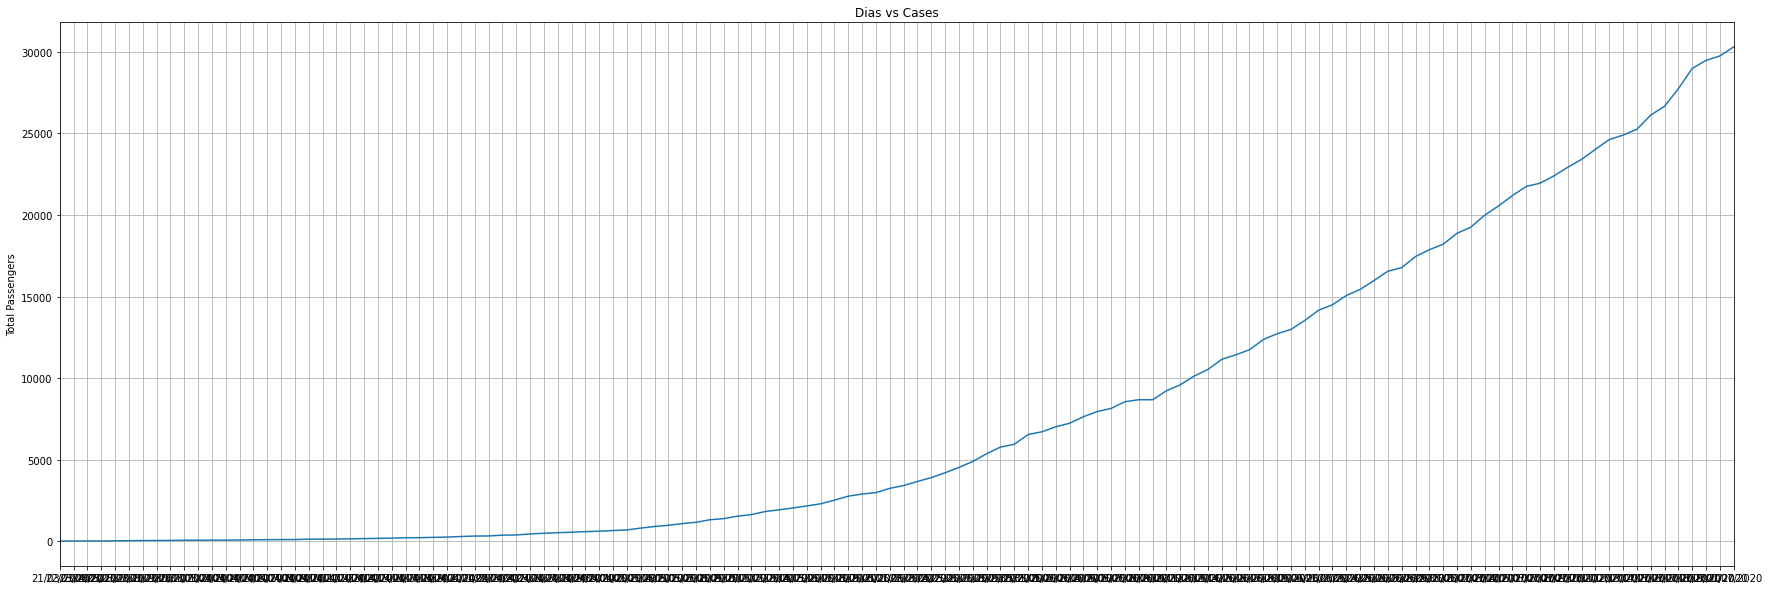

In [185]:
plt.title('Dias vs Cases')
plt.ylabel('Total Passengers')
plt.grid(True)
plt.autoscale(axis='x', tight=True)
plt.plot(flight_data['cases'])
plt.plot(xx,actual_predictions)
plt.show()

